In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import feature

from PIL import Image

One of the approaches to the problem of car classification could be to analyse the outlines of cars, as damaged cars would often have unnaturally distorted and broken edges rather than smooth outlines.

The edges can be detected via converting the original image to grayscale and applying Canny edge detection.

In [30]:
def display_canny_edge_detector(image, sigmas, columns):
    plt.figure(figsize=(20,20))
    rows = (len(sigmas) + 1) / columns + int((len(sigmas) + 1) % columns > 0)
    plt.subplot(rows, columns, 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Original image', fontsize=20)
    for i, sigma in enumerate(sigmas):
        edges = feature.canny(image, sigma=sigma)
        plt.subplot(rows, columns, i + 2)
        plt.imshow(edges, cmap=plt.cm.gray)
        plt.axis('off')
        plt.title('Canny filter, $\sigma=$' + str(sigma), fontsize=20)

The result of applying Canny edge detector to an example image of a "good" car is displayed below.

Different images correspond to different sigma coefficients used in the Gaussian filter used to smooth the image prior to the actual edge detection. As can be observed, larger values lead to filtering out more noise.

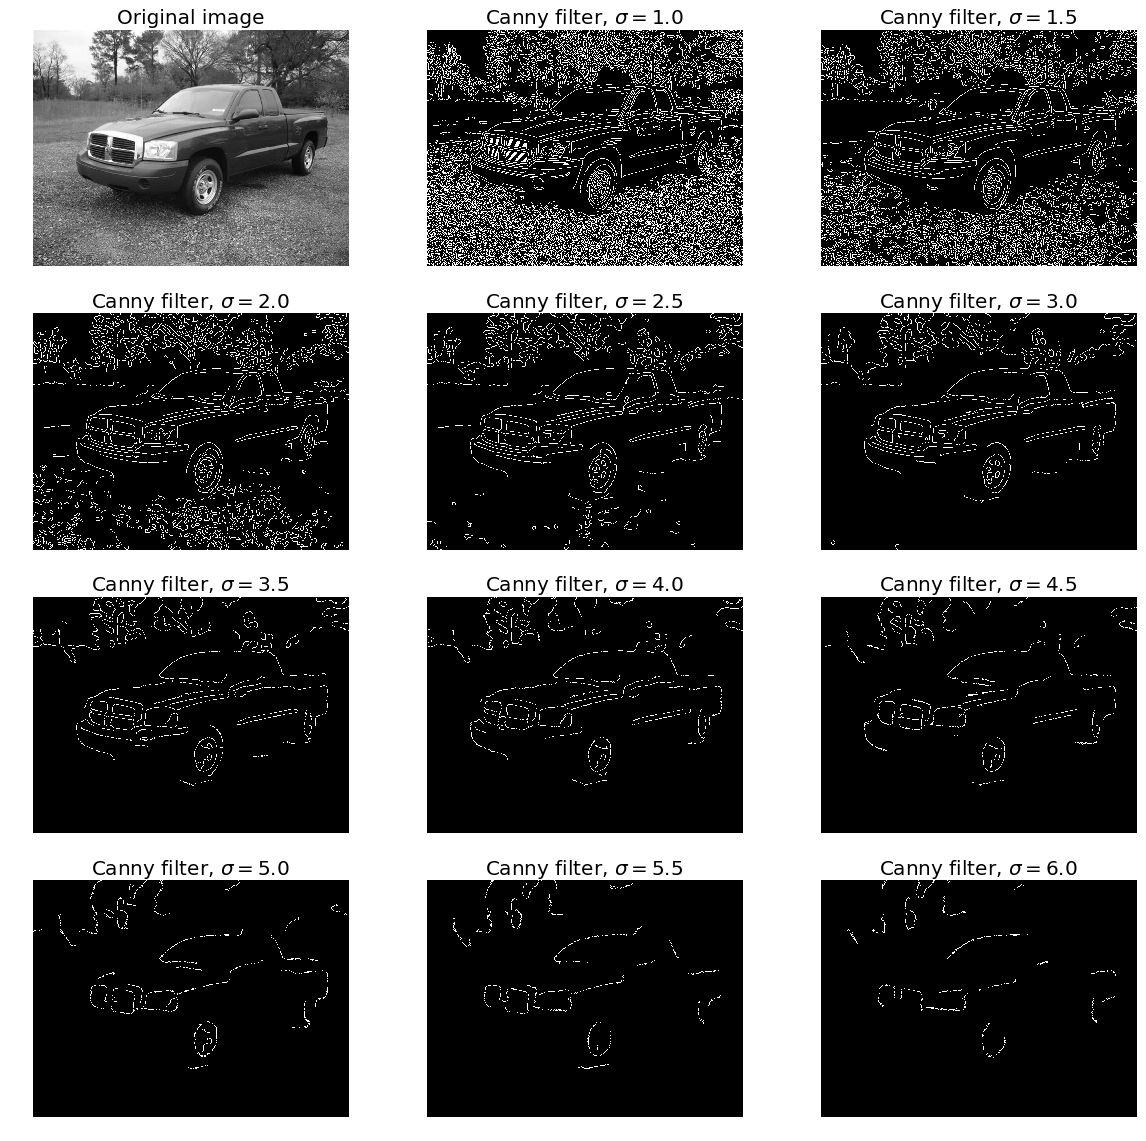

In [34]:
image = np.asarray(Image.open("C:\\Users\\Sasha\\Desktop\\broken cars\\datasets\\good_cars\\good_0003.jpg").convert('L'))

sigmas = np.arange(1.0, 6.5, 0.5)

display_canny_edge_detector(image, sigmas, 3)

Another example for the image of a "damaged" car.

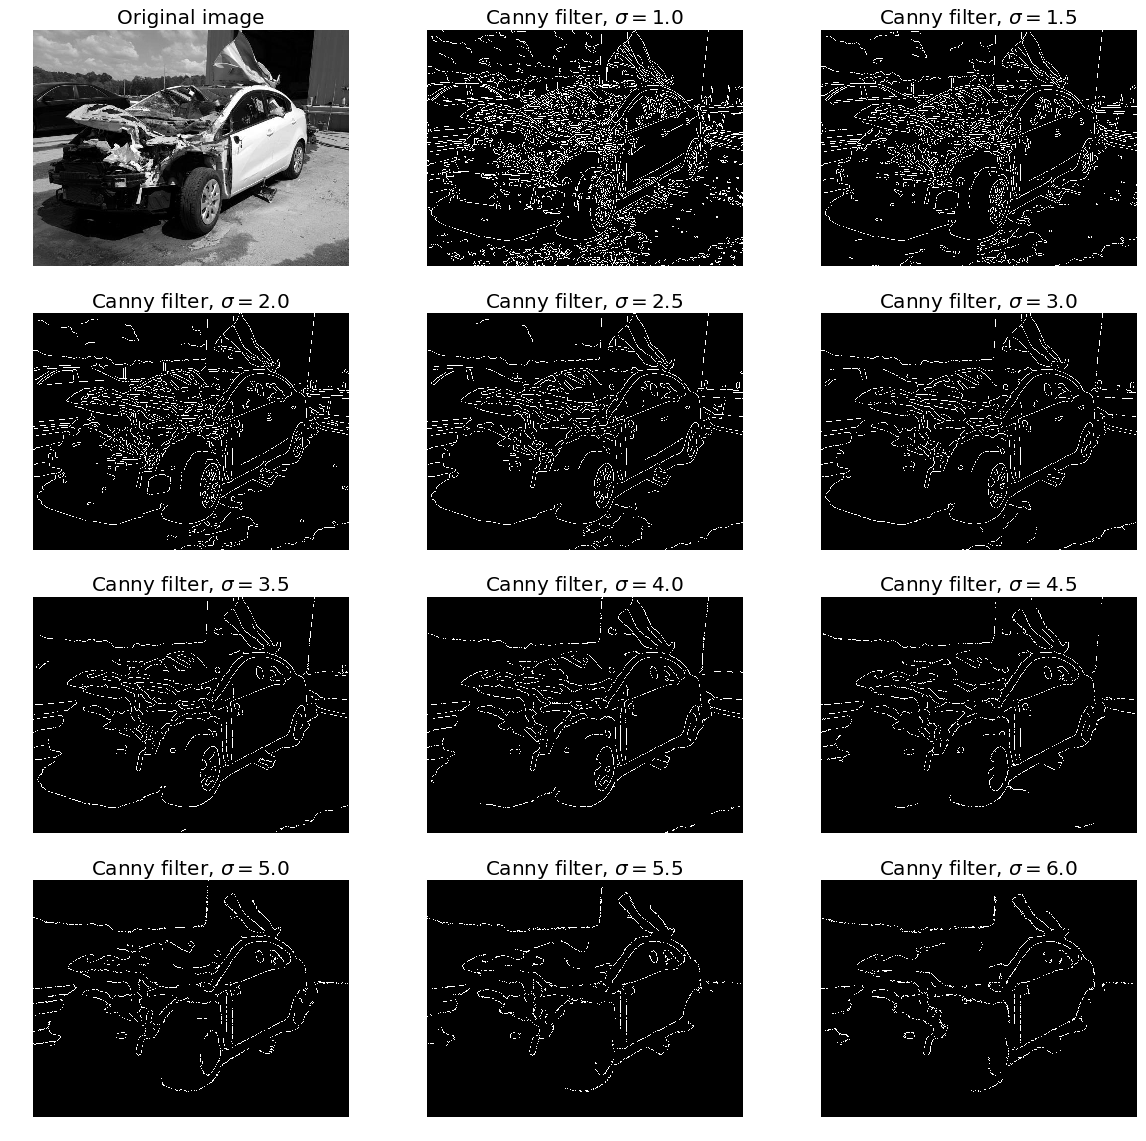

In [35]:
image = np.asarray(Image.open("C:\\Users\\Sasha\\Desktop\\broken cars\\datasets\\damaged_cars\\damaged_0081.jpg").convert('L'))

sigmas = np.arange(1.0, 6.5, 0.5)

display_canny_edge_detector(image, sigmas, 3)

The problem with this approach can be that while filtering out the noise, it also leaves out a lot of potentially useful information such as color and also that some of the outlines stem actually not from the car but from the environment in which it was photographed, but may influence the decision of the classifier.